# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
def save(filename,file):
    data = open(filename,'wb')
    pickle.dump(file,data)
    data.close()

def load(filename):
    return pickle.load(path + filename)

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combined = pd.concat([train,test])
display(combined.head())

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [4]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


# Data Cleaning

### Let us deal with each variable one at a time

AGE

In [5]:
median_age = combined['Age'].median()
combined['Age'].fillna(combined['Age'].median(), inplace = True)
save('median_age.sav',median_age)

CABIN

In [6]:
# There are too many missing entries. It's better if we just delete the entries
combined.drop(['Cabin'],axis=1,inplace=True)

EMBARKED

In [7]:
combined[combined['Embarked'].isnull() == True]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [8]:
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace = True)

In [9]:
embarked_mode = combined['Embarked'].mode()[0]
save('embarked_mode.sav',embarked_mode)

One-Hot Encoding for Fare/FareBin

FARE

In [10]:
combined[combined['Fare'].isnull() == True]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [11]:
median_fare = combined['Fare'].median()
combined['Fare'].fillna(combined['Fare'].median(), inplace = True)
save('median_fare.sav',median_fare)

# Feature Engineering

In [12]:
combined.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [13]:
combined.drop(['Ticket'],axis=1,inplace=True)

TITLE

In [14]:
combined['Title'] = combined['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0] #Identify the title in their name
combined.drop(['Name'],axis=1,inplace=True)

In [15]:
combined['Title'].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Mlle              2
Ms                2
Major             2
Dona              1
Jonkheer          1
Sir               1
Lady              1
Don               1
Mme               1
Capt              1
the Countess      1
Name: Title, dtype: int64

In [16]:
# Need to decide on this later
combined[combined['Title']=='Rev']#['Title'] = 'Mr'

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
149,42.0,S,13.000,0,150,2,male,0,0.0,Rev
150,51.0,S,12.525,0,151,2,male,0,0.0,Rev
249,54.0,S,26.000,0,250,2,male,1,0.0,Rev
626,57.0,Q,12.350,0,627,2,male,0,0.0,Rev
848,28.0,S,33.000,1,849,2,male,0,0.0,Rev
886,27.0,S,13.000,0,887,2,male,0,0.0,Rev
149,30.0,S,26.000,1,1041,2,male,1,NaN,Rev
164,41.0,S,13.000,0,1056,2,male,0,NaN,Rev


In [17]:
# Need to decide on this later
combined[combined['Title']=='Col']#['Title'] = 'Mr'

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
647,56.0,C,35.500,0,648,1,male,0,1.0,Col
694,60.0,S,26.550,0,695,1,male,0,0.0,Col
131,53.0,C,28.500,0,1023,1,male,0,NaN,Col
202,47.0,C,227.525,0,1094,1,male,1,NaN,Col


In [18]:
display(combined[combined['Title']=='Ms'])
combined[combined['Title']=='Ms']['Title'] = 'Miss'

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
443,28.0,S,13.00,0,444,2,female,0,1.0,Ms
88,28.0,Q,7.75,0,980,3,female,0,NaN,Ms


In [19]:
display(combined[combined['Title']=='Mlle'])
combined[combined['Title']=='Mlle']['Title'] = 'Miss'

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
641,24.0,C,69.3000,0,642,1,female,0,1.0,Mlle
710,24.0,C,49.5042,0,711,1,female,0,1.0,Mlle


In [20]:
title_names = (combined['Title'].value_counts() < 10)
save('title_names.sav',title_names)
combined['Title'] = combined['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

In [21]:
combined['Title'].value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
Misc       34
Name: Title, dtype: int64

FAMILY SiZE AND ALONE

In [22]:
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1 #Total number of siblings + parents + himself
combined['IsAlone'] = 1 #Initially Mark everyone as alone
combined['IsAlone'].loc[combined['FamilySize']>1] = 0 #If they are not alone, then mark this position as 0

AGE-BIN

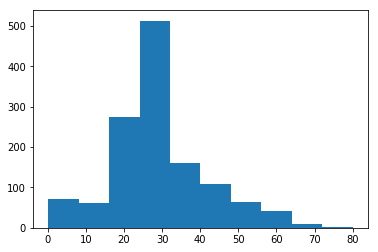

In [23]:
plt.hist(combined.Age)
plt.show()

In [24]:
def get_age_bins(age):
    if age < 20:
        return 1
    elif age > 20 and age < 30:
        return 2
    elif age > 30 and age < 45:
        return 3
    else:
        return 4
combined.Age = combined.Age.apply(lambda x: get_age_bins(x))

FARE-BIN

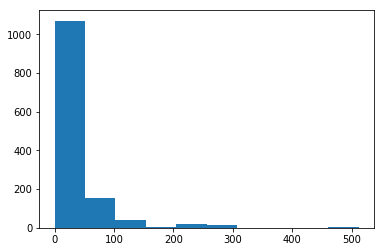

In [25]:
plt.hist(combined.Fare)
plt.show()

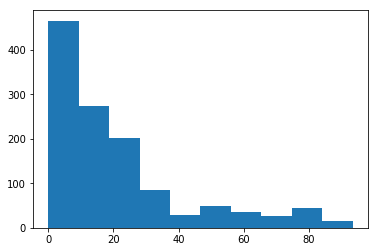

In [26]:
plt.hist(combined.Fare[combined.Fare < 100])
plt.show()

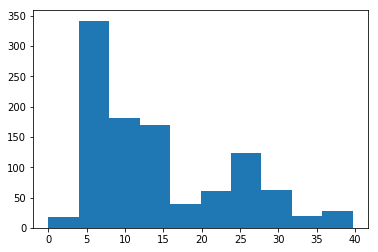

In [27]:
plt.hist(combined.Fare[combined.Fare < 40])
plt.show()

In [28]:
def get_fare_bins(fare):
    if fare < 15:
        return 1
    elif fare > 15 and fare < 40:
        return 2
    elif fare > 40 and fare < 100:
        return 3
    else:
        return 4

In [29]:
combined.Fare = combined.Fare.apply(lambda x: get_fare_bins(x))

One Hot Encoding for Embarked

In [30]:
combined['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [31]:
len(combined)

1309

In [32]:
def encode_embarked(embarked):
    if embarked == 'S':
        return [1,0,0]
    elif embarked == 'C':
        return[0,1,0]
    elif embarked == 'Q':
        return [0,0,1]

In [33]:
combined.Embarked = combined.Embarked.apply(lambda x: encode_embarked(x))
combined['Embarked_S'] = combined.Embarked.apply(lambda x: x[0])
combined['Embarked_C'] = combined.Embarked.apply(lambda x: x[1])
combined['Embarked_Q'] = combined.Embarked.apply(lambda x: x[2])
combined.drop(['Embarked'],axis = 1, inplace = True)

In [34]:
combined.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title,FamilySize,IsAlone,Embarked_S,Embarked_C,Embarked_Q
0,2,1,0,1,3,male,1,0.0,Mr,2,0,1,0,0
1,3,3,0,2,1,female,1,1.0,Mrs,2,0,0,1,0
2,2,1,0,3,3,female,0,1.0,Miss,1,1,1,0,0
3,3,3,0,4,1,female,1,1.0,Mrs,2,0,1,0,0
4,3,1,0,5,3,male,0,0.0,Mr,1,1,1,0,0


One-Hot Encoding for Sex

In [35]:
def encode_gender(gender):
    if gender == 'male':
        return [1,0]
    return [0,1]

In [36]:
combined['Sex'].unique()

array(['male', 'female'], dtype=object)

In [37]:
combined['Sex'] = combined.Sex.apply(lambda x: encode_gender(x))
combined['Sex_male'] = combined.Sex.apply(lambda x: x[0])
combined['Sex_female'] = combined.Sex.apply(lambda x: x[1])
combined.drop(['Sex'],axis = 1, inplace = True)

One-Hot Encoding for Title

In [38]:
def encode_title(title):
    if title == 'Mr.':
        return [1,0,0,0,0]
    elif title == 'Mrs':
        return [0,1,0,0,0]
    elif title == 'Miss':
        return [0,0,1,0,0]
    elif title == 'Master':
        return [0,0,0,1,0]
    return [0,0,0,0,1]

In [39]:
combined['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Misc'], dtype=object)

In [40]:
combined['Title'] = combined.Title.apply(lambda x: encode_title(x))
combined['Title_Mr'] = combined.Title.apply(lambda x: x[0])
combined['Title_Mrs'] = combined.Title.apply(lambda x: x[1])
combined['Title_Miss'] = combined.Title.apply(lambda x: x[2])
combined['Title_Master'] = combined.Title.apply(lambda x: x[3])
combined['Title_Misc'] = combined.Title.apply(lambda x: x[4])
combined.drop(['Title'],axis = 1, inplace = True)

One-Hot Encoding for IsAlone

In [41]:
combined['IsAlone'].unique()

array([0, 1])

In [42]:
def encode_isalone(isalone):
    if isalone == 0:
        return [1,0]
    return [0,1]

In [43]:
combined.IsAlone = combined.IsAlone.apply(lambda x: encode_isalone(x))
combined['IsAlone_0'] = combined.IsAlone.apply(lambda x: x[0])
combined['IsAlone_1'] = combined.IsAlone.apply(lambda x: x[1])
combined.drop(['IsAlone'],axis = 1,inplace = True)

Identifying Baseline Accuracy before building Machine Learning Models!

In [44]:
combined['Survived'].value_counts(normalize = True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

In [45]:
combined.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,FamilySize,Embarked_S,Embarked_C,Embarked_Q,Sex_male,Sex_female,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Misc,IsAlone_0,IsAlone_1
0,2,1,0,1,3,1,0.0,2,1,0,0,1,0,0,0,0,0,1,1,0
1,3,3,0,2,1,1,1.0,2,0,1,0,0,1,0,1,0,0,0,1,0
2,2,1,0,3,3,0,1.0,1,1,0,0,0,1,0,0,1,0,0,0,1
3,3,3,0,4,1,1,1.0,2,1,0,0,0,1,0,1,0,0,0,1,0
4,3,1,0,5,3,0,0.0,1,1,0,0,1,0,0,0,0,0,1,0,1


This means that the baseline accuracy for our problem statement is 61%

Now let us prepare training and validation data

In [46]:
# Let us shuffle the rows now

In [47]:
combined = combined.sample(frac=1)

In [48]:
combined.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,FamilySize,Embarked_S,Embarked_C,Embarked_Q,Sex_male,Sex_female,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Misc,IsAlone_0,IsAlone_1
777,1,1,0,778,3,0,1.0,1,1,0,0,0,1,0,0,1,0,0,0,1
325,2,1,0,1217,3,0,NaN,1,1,0,0,1,0,0,0,0,0,1,0,1
204,1,1,0,205,3,0,1.0,1,1,0,0,1,0,0,0,0,0,1,0,1
160,2,1,0,1052,3,0,NaN,1,0,0,1,0,1,0,0,1,0,0,0,1
188,2,3,2,1080,3,8,NaN,11,1,0,0,0,1,0,0,1,0,0,1,0


In [49]:
cols = combined.columns
for col in cols:
    combined[col] = combined[col].astype(float)
train = combined[combined['Survived'].notnull()].reset_index(drop=True)
test = combined[combined['Survived'].isnull()].drop(['Survived'],axis=1).reset_index(drop=True)

train_x = train.drop(['Survived','PassengerId'],axis=1)[:800]
train_y = train['Survived'][:800]

val_x = train.drop(['Survived','PassengerId'],axis=1)[800:]
val_y = train['Survived'][800:]

# RandomForestClassifier

In [50]:
rf = RandomForestClassifier()
rf.fit(train_x,train_y)
results = rf.predict(train_x)
print('The training data accuracy is ',accuracy_score(train_y,results))
results = rf.predict(val_x)
print('The testing data accurcy is ',accuracy_score(val_y,results))

The training data accuracy is  0.90125
The testing data accurcy is  0.7802197802197802


In [51]:
train_x = train.drop(['Survived','PassengerId'],axis=1)
train_y = train['Survived']

In [52]:
train_x.shape

(891, 18)

In [53]:
rf = RandomForestClassifier()
rf.fit(train_x,train_y)
results = rf.predict(train_x)
print('The training accuracy is',accuracy_score(results,train_y))

The training accuracy is 0.8911335578002245


In [54]:
save('random_forest_classifier.sav',rf)